# 2023-2 언어데이터과학 6강 (2023-09-20) `numpy` 패키지와 배열

## 벡터(vector)

여기에서는 벡터를 실수 값(들)을 순서대로 나열한 것이라고 간주하겠다. (벡터의 엄밀한 개념은 《선형대수학》 강의에서 배울 수 있다.)

### 벡터의 연산: 합과 상수배

벡터 $\vec{x}$와 $\vec{y}$가 각각 $n$개의 실수 값으로 이루어져 있다고 가정하고 $\vec{x}=(x_1, x_2, \dots, x_n)$ 및 $\vec{y}=(y_1, y_2, \dots, y_n)$로 표기하자. 이때 $\vec{x}$와 $\vec{y}$는 $n$차원 벡터라고 부른다.

그리고 $a$를 하나의 실수 값으로 놓자. 그러면 아래와 같은 두 등식이 성립한다.

$$
\begin{align}
\vec{x} + \vec{y}
  & = (x_1+y_1, x_2+y_2, \dots, x_n+y_n) &&\text{(합)}\\
a\cdot\vec{x}
  & = (ax_1, ax_2, \dots, ax_n) &&\text{(상수배)}\\
\end{align}
$$

즉 두 벡터를 서로 더하는 **합**의 연산과 하나의 실수를 하나의 벡터에 곱하는 **상수배**의 연산이 가능하다.

### 파이썬에서 벡터를 표현하기: 리스트?

그런데 이 $(x_1, x_2, \dots, x_n)$과 같은 대상을 파이썬에서 어떻게 처리할 수 있을까?

우선 값을 순서대로 나열한다는 점에서 리스트로 표현하는 것을 생각해 볼 수 있다.

예를 들어 6차원 벡터를 아래와 같이 여섯 개의 원소로 이루어진 리스트로 표기하는 것이다.

In [ ]:
x = [3, 1, 4, 1, 5, 9]
y = [2, 3, 0, 5, 1, 0]

print('x =', x)
print('y =', y)

x = [3, 1, 4, 1, 5, 9]
y = [2, 3, 0, 5, 1, 0]


### 리스트 표현의 문제점

하지만 리스트로는 벡터의 합과 상수배 연산을 수행하기 어렵다. 이미 배운 것과 같이 리스트의 연산에서 덧셈 기호는 연결을, 곱셈 기호는 반복을 의미하기 때문이다.

In [ ]:
x = [3, 1, 4, 1, 5, 9]
y = [2, 3, 0, 5, 1, 0]

print('x + y =', x + y) # 연결
print('2 * x =', 2 * x) # 반복
# print(x > 2) # TypeErrror
# print(x ** 2) # TypeError

x + y = [3, 1, 4, 1, 5, 9, 2, 3, 0, 5, 1, 0]
2 * x = [3, 1, 4, 1, 5, 9, 3, 1, 4, 1, 5, 9]


따라서 벡터를 처리하기 위해서는 덧셈 기호(`+`)로 합을, 곱셈 기호(`*`)를 상수배로 연산할 수 있는 자료형이 필요하다.

## `numpy` 패키지: **Num**erical **Py**thon

벡터를 표현할 수 있는 자료형은 파이썬에 내장되어 있지 않고, `numpy`라는 파이썬 패키지에 들어 있다. 파이썬에서 패키지(package)는 여러 모듈(module)로 이루어진 폴더를 말한다. 패키지를 모은 것은 라이브러리(library)라고 한다.

`numpy` 패키지는 Colab 환경에 포함되어 있으므로 따로 설치할 필요는 없다.

개인 컴퓨터에서 사용하는 경우는 기본적으로 설치를 해 주어야 한다. 아래의 코드 셀을 실행하면 `numpy`의 최신 버전이 설치된다.

In [ ]:
%pip install -U numpy



`numpy`는 파이썬을 활용할 때 아주 자주 쓰이는 패키지다. 특히 기존의 머신러닝에서는 거의 항상 사용된다. 사용할 때마다 다섯 글자씩 이름을 입력하는 것이 번거로우므로, 관습적으로 `np` 두 글자로 줄여서 가져온다.

In [ ]:
import numpy as np

### 함수 예시

우선 `numpy`는 Numerical Python이라는 이름에 걸맞게 수치 연산에 필요한 함수를 많이 갖고 있다.

예를 들어 모든 값들의 평균을 구하는 `np.mean()`, 가장 큰 값의 인덱스를 구하는 `np.argmax()` 등이 자주 사용된다.

In [ ]:
x = [3, 1, 4, 1, 5, 9]
y = [2, 3, 0, 5, 1, 0]

# x의 평균: (3+1+4+1+5+9)/6
print('mean of x', np.mean(x), sep='\t')

# y의 최댓값의 인덱스: 최댓값 5에 해당하는 인덱스 3(네 번째 원소)
print('argmax of y', np.argmax(y), sep='\t')

mean of x	3.8333333333333335
argmax of y	3


### 배열(array) 자료형

위에서 `np.mean()`, `np.argmax()` 등의 함수가 리스트를 인자로 받을 수 있다는 것을 살펴보았다.

그러나 `numpy`에서 기본적으로 사용하는 자료형은 `numpy.ndarray`이다. `ndarray`는 $n$차원 배열을 의미한다. 앞서 알아본 벡터는 배열의 특수한 경우에 해당한다.

리스트 `x`와 `y`를 배열로 형변환해 보자. 파이썬 코드에서 `numpy.ndarray`는 `np.array`라고 쓴다.





In [ ]:
# 형변환
x = np.array(x)
y = np.array(y)

print('x =', x)
print('y =', y)
print(type(x))

x = [3 1 4 1 5 9]
y = [2 3 0 5 1 0]
<class 'numpy.ndarray'>


`type()` 함수로 자료형을 확인해 보면 `numpy.ndarray`인 것을 확인할 수 있다.

이 배열이라는 자료형에서는 덧셈 기호(`+`)와 곱셈 기호(`*`)가 각각 합과 상수배의 연산을 수행한다.

In [ ]:
print('x + y =', x + y) # 합: 원소별로 더함
print('2 * x =', x * 2) # 상수배: 각 원소에 상수를 곱함

x + y = [5 4 4 6 6 9]
2 * x = [ 6  2  8  2 10 18]


배열의 편리한 점은 또 있다. `numpy`에서는 배열을 하나의 수치처럼 놓고 비교 연산, 거듭제곱 연산 등을 수행할 수 있다.

예를 들어 `x > 2`는 `x`의 모든 원소를 각각 비교한 결과로 이루어진 배열이 되고, `x ** 2`는 `x`의 모든 원소를 각각 제곱한 결과로 이루어진 배열이 된다.


In [ ]:
print('x > 2  =', x > 2) # 원소별 비교
print('x ** 2 =', x ** 2) # 각 원소의 제곱

x > 2  = [ True False  True False  True  True]
x ** 2 = [ 9  1 16  1 25 81]


### 다차원 배열 만들기

이제 벡터보다 더 복잡한 배열을 만들어 보자.

보통 값들을 한 방향으로 나열한 배열(1-D array)을 벡터(vector)라고 하고, 두 방향으로 나열한 배열(2-D array)을 행렬(matrix)라고 하며, 세 방향 이상으로 나열한 것을 텐서(tensor)라고 한다.

아래 그림과 같이 벡터를 쌓아서 행렬을 만들고 행렬을 쌓아서 텐서를 만든다고 이해할 수 있다.

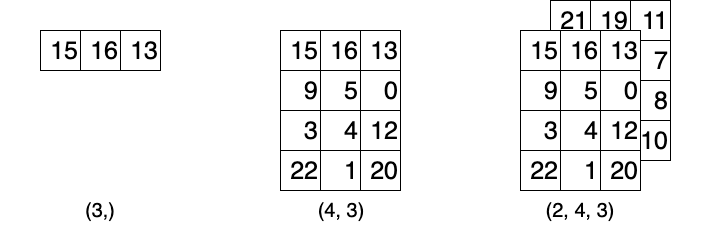

#### `np.zeros()` 함수: 0으로 채우기

`np.zeros()` 함수는 0으로 채워진 배열을 반환하는 함수다. 인자로는 정수로 이루어진 튜플이 들어간다. 튜플의 원소는 배열의 차원을 의미한다. 이런 튜플을 배열의 형상(shape)이라고 한다.

+ `np.zeros((3,))` 0번째 방향(행, 가로축)으로 3개의 0을 나열한 배열
+ `np.zeros((4, 3))` 위의 배열을 새로운 방향(열, 세로축)으로 4개 쌓은 배열
+ `np.zeros((2, 4, 3))` 위의 배열을 새로운 방향으로 2개 쌓은 배열

In [ ]:
print(np.zeros((3,)))

[0. 0. 0.]


In [ ]:
print(np.zeros((4, 3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
print(np.zeros((2, 4, 3)))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


여기에서 `(3,)`, `(4, 3)`, `(2, 4, 3)` 등을 배열의 형상(shape)이라고 한다.

차원의 개수가 늘어날수록 배열이 복잡해지는데, 항상 마지막 차원의 방향이 가로축, 마지막 바로 앞의 차원의 방향이 세로축이 된다.

#### `np.ones()` 함수: 1로 채우기

`np.ones()` 함수는 1로 채워진 배열을 반환하는 함수다. 필수 인자로는 `np.zeros()`와 마찬가지로 배열의 형상을 나타내는 튜플이 들어간다.

In [ ]:
print(np.ones((3, 2)))

[[1. 1.]
 [1. 1.]
 [1. 1.]]


위의 실행 결과를 자세히 살펴보면 `np.zeros()`와 `np.ones()` 모두 기본적으로 `float` 자료형의 값들을 생성한다. `float` 이외의 자료형으로 만들고 싶으면 `dtype`이라는 인자의 값으로 자료형을 넣어 주면 된다.

예를 들어 `int` 자료형에서 1은 정수 `1`이다.

In [ ]:
print(np.ones((3, 2), dtype=int))

[[1 1]
 [1 1]
 [1 1]]


`bool` 자료형에서는 1이 `True`다.

In [ ]:
print(np.ones((3, 2), dtype=bool))

[[ True  True]
 [ True  True]
 [ True  True]]


#### `np.empty()` 함수: 아무 값으로나 채우기

문제를 해결하는 과정에서는 특정한 형상의 빈 배열을 일단 만들어 놓고 나중에 구체적인 값을 업데이트하는 경우가 많다. 이 경우 `np.empty()`를 사용하는 것이 가장 효율적이다.

예를 들어 아래 코드에서는 `(5, 4)` 형상의 각 자리에 아무 값이나 넣어서 만든 배열을 돌려준다. 이 경우 배열은 $(5\times4)$차원 행렬에 해당한다.

In [ ]:
print(np.empty((5, 4)))

[[0.  0.  0.3 1. ]
 [0.  0.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  0.  0.  1. ]
 [0.5 0.  0.  1. ]]


### 배열의 형상

이제 0이나 1, 혹은 아무 값으로나 채워진 배열이 아니라 실제로 유의미한 값들을 가지는 배열을 살펴보자.

여기에서는 형상이 `(2, 4, 3)`인 배열을 설정하겠다. 이것은 3차원 배열 4개를 쌓아서 만든 `(4, 3)`차원 배열 2개를 쌓아서 만든 `(2, 4, 3)`차원 배열로 이해할 수 있다.

#### `np.arange()` 함수: `range()`의 `numpy` 버전

형상이 `(2, 4, 3)`인 배열은 $2 \times 4 \times 3=24$개의 원소를 세 방향으로 나열한 것이다.

즉, 배열을 완성하기 위해서는 24개의 값이 필요하다.

이 24개의 값으로는 0부터 23까지의 24개 정수를 사용하려고 한다. 이것은 `range(24)`로 표현할 수도 있지만, `numpy`를 사용하는 김에 `np.arange(24)`를 써 보자. 둘의 차이는 반환값의 자료형이다. `range()`는 `range`라는 고유의 자료형을 돌려주지만, `np.arange()`는 `numpy.ndarray` 배열을 반환한다.

In [ ]:
type(range(2 * 4 * 3))

range

In [ ]:
a = np.arange(2 * 4 * 3)
print(type(a))
print(a)

<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


#### `np.ndarray.shape` 속성: 배열의 형상

위에서 만든 배열의 형상은 `.shape` 속성에서 확인할 수 있다. `np.arange(24)`로 만들어진 배열은 `(24, )`, 즉 24차원 벡터가 된다.

In [ ]:
print(a.shape)

(24,)


#### `np.ndarray.reshape()` 메소드: 배열의 형상 바꾸기

다음으로는 이 24차원 벡터의 원소들을 다른 형상으로 배열해 볼 것이다.

배열의 형상을 바꾸기 위해서는 `.reshape()` 메소드를 사용하고, 인자로는 형상을 나타내는 튜플이 들어간다.

예를 들어 24개의 원소는 `(2, 3, 4)` 형상으로 배열될 수 있다.

In [ ]:
print(a.reshape((2, 3, 4)))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


또 `(4, 6)` 형상으로도 배열될 수 있다.

In [ ]:
print(a.reshape((4, 6)))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


한편 24개의 원소를 `(3, 5)` 형상으로 배치할 수는 없으므로, 이를 시도하면 `ValueError`가 발생한다.

In [ ]:
# a.reshape((3, 5))

#### `np.random` 모듈

0부터 24까지의 값을 순서대로 나열하면 심심하므로, 순서를 뒤섞어서 재배치해 보자.

`numpy` 패키지에는 랜덤으로 값을 재배치하거나 생성하기 위한 함수로 이루어진 `np.random` 모듈이 포함되어 있다.

아래 코드에서는 먼저 랜덤으로 값을 재배치하되 결과를 똑같이 재현할 수 있도록 `np.random.seed()` 함수로 seed를 설정한다. seed의 값으로는 $0$부터 $(2^{32}-1)$ 사이의 정수가 사용될 수 있다. 여기에서는 1055를 seed로 삼는다.

다음으로는 `np.random.shuffle()` 함수로 값을 뒤섞는다. 이때 함수를 호출하는 것만으로 `a`의 순서가 뒤섞였으므로, 이 함수는 원본을 변화시키는 파괴적 함수라고 할 수 있다.

In [ ]:
np.random.seed(1055) # seed 설정 # https://www.youtube.com/watch?v=pXMH56hJBVI
np.random.shuffle(a) # 순서 뒤섞기
print(a)

[15 16 13  9  5  0  3  4 12 22  1 20 21 19 11 17 14  7  2  6  8 18 23 10]


이제 `a`의 형상을 `(2, 4, 3)`으로 바꾸어 주면 위의 값들이 새로운 형상에 맞게 나열된다.

In [ ]:
A = a.reshape((2, 4, 3))
print(A)
print(A.shape)

[[[15 16 13]
  [ 9  5  0]
  [ 3  4 12]
  [22  1 20]]

 [[21 19 11]
  [17 14  7]
  [ 2  6  8]
  [18 23 10]]]
(2, 4, 3)


#### 인덱싱과 슬라이싱

배열의 일부분이나 특정한 원소에 접근하기 위해서는 리스트와 마찬가지로 인덱스와 슬라이스를 사용할 수 있다.

우선 인덱스 값을 하나만 사용하는 경우를 살펴보자. `A[0]`은 배열 `A`의 첫 번째 차원의 0번 인덱스에 해당하는 값을 말한다. `A`의 형상은 `(2, 4, 3)`이고, 이는 `(4, 3)` 형상의 배열 2개를 쌓은 것으로 이해할 수 있다. 그러므로 `A[0]`은 두 개의 `(4, 3)` 배열 중 첫 번째에 해당한다.

In [ ]:
print(A[0])

[[15 16 13]
 [ 9  5  0]
 [ 3  4 12]
 [22  1 20]]


`A[0]` 또한 배열이므로 여기에 다시 인덱싱을 적용할 수 있다. `A[0]`의 1번 인덱스에 해당하는 값은 `A[0][1]`로 접근할 수 있는데, `numpy`에서는 이것을 `A[0,1]`로 표현하는 것이 일반적이다.

In [ ]:
print(A[0,1])
print(A[0][1])

[9 5 0]
[9 5 0]


마찬가지로 `A[0][1][2]`는 `A[0,1,2]`로 쓴다.

In [ ]:
print(A[0,1,2])
print(A[0][1][2])

0
0


슬라이싱 역시 기존의 용례와 같되 차원의 개수만큼 사용할 수 있다.

`A[0,:,2]`은 `A[0]`에 포함된 모든(`[:]`) 배열에서 세 번째(`[2]`) 값을 가져오라는 뜻이다.

In [ ]:
print(A[0,:,2])

[13  0 12 20]


#### `np.ndarray.max()` 메소드와 축의 개념

이제 배열의 최댓값을 다양한 방향에서 구해 보자.

최댓값을 얻기 위해서는 `np.max()` 함수나 `np.ndarray.max()` 메소드를 사용할 수 있다. 여기에서는 타자 수를 줄이기 위해 `np.max(A)`보다 `A.max()`를 사용하겠다.

우선 메소드를 아무 인자 없이 호출하면 `A`라는 배열의 모든 원소 중에서 가장 큰 값을 반환한다.

In [ ]:
print(A.max())

23


그런데 배열을 사용하는 이유는 일반적으로 각 차원의 방향축이 유의미한 정보를 담고 있기 때문이다. 그래서 `max()` 함수에는 이를 반영하기 위해 `axis`라는 인자가 포함되어 있다.

`axis`의 값은 형상 튜플의 인덱스를 의미한다. 즉, `A.max(axis=0)`는 0번 인덱스에 해당하는 첫 번째 차원의 방향축을 따라 이동하면서 최댓값을 구하게 된다. 아래 그림을 참조하면, 형상이 `(2, 4, 3)`인 배열의 최댓값을 구할 때 인자의 값을 `axis=0`로 설정하는 경우 결과의 형상은 첫 번째 차원의 값을 소거한 `(4, 3)`이 된다. `axis=1`, `axis=2`도 같은 방식으로 작동한다.


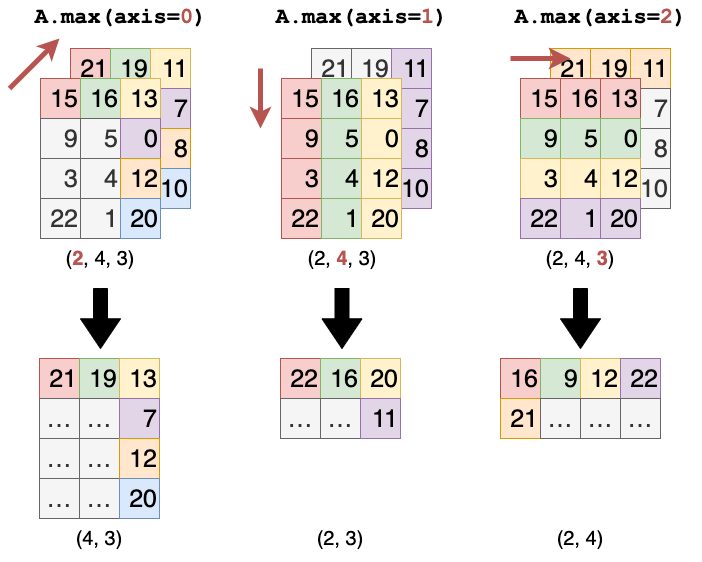

In [ ]:
print(A.max(axis=0))
print()
print(A.max(axis=1))
print()
print(A.max(axis=2))
print()
print(A.max(axis=-1))

[[21 19 13]
 [17 14  7]
 [ 3  6 12]
 [22 23 20]]

[[22 16 20]
 [21 23 11]]

[[16  9 12 22]
 [21 17  8 23]]

[[16  9 12 22]
 [21 17  8 23]]


최댓값을 구하는 `max()` 뿐만 아니라 평균값을 구하는 `mean()`도 같은 방식으로 작동한다.

### 배열 활용 예시

차원이 3개인 배열을 실제로 어떤 경우에 사용할 수 있을까?

현실에 가까운 예시로 성적부를 생각할 수 있다.

학생 두 명이 3~6월에 걸쳐 국어, 수학, 영어 3과목의 시험을 보았다고 가정하자. 여기서 시험 점수는 학생, 월, 과목 세 개의 요인에 따라 나열될 수 있다. 요인 하나가 배열의 방향축 하나에 해당한다.

1. 첫 번째 차원: 학생(2명)
1. 두 번째 차원: 월(4개월)
1. 세 번째 차원: 과목(3개)

즉, 아래 그림과 같이 두 장의 성적표로 이루어진 성적부를 배열로 표현하겠다는 것이다.

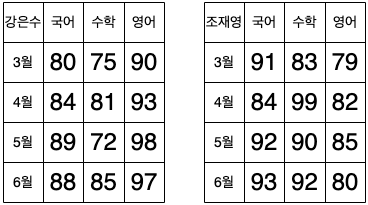

In [ ]:
scores = np.array(
    [[[80, 75, 90],
      [84, 81, 93],
      [89, 72, 98],
      [88, 85, 97]],

     [[91, 83, 79],
      [84, 99, 82],
      [92, 90, 85],
      [93, 92, 80]]]
)
scores.shape

(2, 4, 3)

이 배열에서 `.mean()` 메소드를 아무 인자 없이 호출하면 모든 시험 점수의 평균값이 구해진다.

In [ ]:
print(scores.mean())

86.75


그러나 일반적으로 성적을 집계할 때는 학생별 평균 등 특정한 요인에 따라 평균값을 구하게 된다.

예를 들어 `axis=0`으로 설정하면 학생의 축을 따라 평균값을 구한다. 이것은 반 전체의 월별·과목별 평균을 계산하는 것과 같다. 가령 이 학급의 3월 국어 성적 평균은 85.5점, 3월 수학 점수는 79.0점, 3월 영어 점수는 84.5점인 식이다.

In [ ]:
print(scores.mean(axis=0))

[[85.5 79.  84.5]
 [84.  90.  87.5]
 [90.5 81.  91.5]
 [90.5 88.5 88.5]]


`axis=1`에서는 월의 축을 따라 계산한다. `.argmax()` 메소드의 경우 모든 월 중에서 가장 높은 점수를 얻은 월의 인덱스를 찾는 데 사용된다.

In [ ]:
print(scores.argmax(axis=1))

[[2 3 2]
 [3 1 2]]


가장 높은 점수를 얻은 월이 몇 월인지를 찾으려면 위에서 찾은 인덱스를 활용하면 된다. 아래 코드에서는 인덱스 자리에 배열이 들어갈 수 있다는 데 유의하자.

In [ ]:
np.array(['3월', '4월', '5월', '6월'])[scores.argmax(axis=1)]

array([['5월', '6월', '5월'],
       ['6월', '4월', '5월']], dtype='<U2')

다시 평균값으로 돌아오면 `axis=2`는 전과목의 평균을 구한다. 즉, 각 학생이 각 월에 치른 시험의 평균 점수를 얻을 수 있다.

In [ ]:
print(scores.mean(axis=2))

[[81.66666667 86.         86.33333333 90.        ]
 [84.33333333 88.33333333 89.         88.33333333]]


`axis`의 인자로 두 개 이상의 축을 선택할 수도 있다. 아래 코드에서는 월의 축(`1`)과 과목의 축(`2`)을 모두 따라서 평균값을 구하게 되어 있다. 그러면 고정된 요인은 학생만 남고, 결과적으로 각 학생이 치른 모든 시험의 평균 점수를 얻는다.

In [ ]:
print(scores.mean(axis=(1, 2)))

[86.  87.5]


### 배열 변형하기

이제 기존 배열을 변형하여 새로운 배열을 얻는 방법을 알아보자.

#### `np.ndarray.transpose()` 메소드: 전치(transpose)

우선 배열 내에서 값들을 나열하는 방향을 바꿀 수 있다. 기존 행렬에서 행을 열로, 열을 행으로 바꾼 것을 전치행렬이라고 하는데, 이를 일반화하여 배열에서 둘 이상의 방향축의 순서를 서로 바꾸는 변형을 통틀어 전치라고 한다.

차원이 1개인 경우 방향축이 한 개이므로 전치 결과가 자기 자신과 같다.



In [ ]:
x = np.array([3, 1, 4, 1, 5, 9])

print('원래의 배열:')
print(x)
print('전치된 배열:')
print(x.transpose())

원래의 배열:
[3 1 4 1 5 9]
전치된 배열:
[3 1 4 1 5 9]


차원이 2개인 경우 두 개의 방향축이 서로 바뀐다. 대각선을 기준으로 돌린 것과 같다.


In [ ]:
x2 = x.reshape((2, 3))

print('원래의 배열:')
print(x2)
print('전치된 배열:')
print(x2.transpose())

원래의 배열:
[[3 1 4]
 [1 5 9]]
전치된 배열:
[[3 1]
 [1 5]
 [4 9]]


차원이 3개 이상인 경우 다양한 전치가 가능하다. 예를 들어 (학생, 월, 과목) 형식의 성적표에서는 월이 세로 방향(`-2`), 과목이 가로 방향(`-1`)이었는데, 아래 그림과 같이 월과 과목의 방향을 서로 바꾸어 (학생, 과목, 월)로 표시할 수 있다.

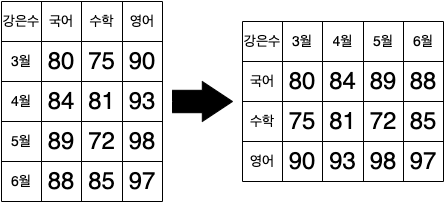

In [ ]:
print('원래의 배열:')
print(scores)
print()
print('전치된 배열:')
print(scores.transpose((0, 2, 1))) # 0번 축은 원래대로 두고 1번 축과 2번 축의 위치를 바꾸기

원래의 배열:
[[[80 75 90]
  [84 81 93]
  [89 72 98]
  [88 85 97]]

 [[91 83 79]
  [84 99 82]
  [92 90 85]
  [93 92 80]]]

전치된 배열:
[[[80 84 89 88]
  [75 81 72 85]
  [90 93 98 97]]

 [[91 84 92 93]
  [83 99 90 92]
  [79 82 85 80]]]


+ 연습: `scores.transpose((0, 2, 1)`와 `scores.reshape((2, 3, 4))`가 어떻게 다른지 확인해 보자.

In [ ]:
# reshape: 행의 개수와 열의 개수를 바꾸기
# 형상은 바뀌지만 값을 나열하는 방향은 변하지 않는다.
print(scores.reshape((2, 3, 4)))

[[[80 75 90 84]
  [81 93 89 72]
  [98 88 85 97]]

 [[91 83 79 84]
  [99 82 92 90]
  [85 93 92 80]]]


#### `np.tile()` 함수: 반복

다음으로 하나의 배열을 여러 번 **반복**해서 나열하는 것도 가능하다.

아래와 같이 `np.tile()` 함수에 반복 횟수와 함께 넣어 주면 된다.

In [ ]:
x = np.array([3, 1, 4, 1, 5, 9])

print(np.tile(x, 2)) # 2회 반볻
print(np.tile(x, 3)) # 3회 반복
print(np.tile(x, 4)) # 4회 반복

[3 1 4 1 5 9 3 1 4 1 5 9]
[3 1 4 1 5 9 3 1 4 1 5 9 3 1 4 1 5 9]
[3 1 4 1 5 9 3 1 4 1 5 9 3 1 4 1 5 9 3 1 4 1 5 9]


#### `np.concatenate()` 함수: 여러 배열을 연결하기

둘 이상의 배열을 연결하는 방법은 크게 두 가지가 있다.

먼저 `np.concatenate()` 함수의 경우 기존의 배열들이 공유하는 방향축을 따라 **연결**한다.

연결하면 형상의 값은 변하지만 형상 튜플의 크기(=차원의 개수)는 바뀌지 않는다.

예를 들어 아래와 같이 `(6, )` 형상의 벡터 2개를 연결하면 `(12, )` 형상의 벡터가 된다.



In [ ]:
x = np.array([3, 1, 4, 1, 5, 9])
y = np.array([2, 3, 0, 5, 1, 0])

print(np.concatenate([x, y]))

[3 1 4 1 5 9 2 3 0 5 1 0]


방향축이 2개인 행렬들을 연결하는 방법에는 두 가지가 있다. 아래와 같이 `(2, 3)` 형상의 행렬 두 개가 있다고 가정하자.

In [ ]:
X = x.reshape(2, 3)
Y = y.reshape(2, 3)

print('X =')
print(X)
print('Y =')
print(Y)

X =
[[3 1 4]
 [1 5 9]]
Y =
[[2 3 0]
 [5 1 0]]


우선 두 행렬을 0번 방향축을 따라 연결하면 두 행렬은 열(=0번 방향축)을 공유하고 행의 개수가 늘어난다.

In [ ]:
# 세로축(열) 방향으로(아래로) 연결하기
print(np.concatenate([X, Y], axis=0)) # shape (4, 3)

[[3 1 4]
 [1 5 9]
 [2 3 0]
 [5 1 0]]


다음으로 두 행렬을 1번 방향축을 따라 연결하면 두 행렬은 행(=1번 방향축)을 공유하고 열의 개수가 늘어난다.

In [ ]:
# 가로축(행) 방향으로(오른쪽) 연결하기
print(np.concatenate([X, Y], axis=1)) # shape (2, 6)

[[3 1 4 2 3 0]
 [1 5 9 5 1 0]]


이렇게 2-D 이상의 배열을 연결하기 위해서는, 어느 방향축을 따라 연결할지를 `axis`의 인자의 값으로 정해 주어야 한다.

#### `np.stack()` 함수: 여러 배열을 쌓아올리기

`np.concatenate()` 함수와 달리 `np.stack()` 함수는 기존의 배열들을 새로운 방향축으로 **쌓아올린다**.

이 경우 새로 쌓아올리는 방향이 생기므로 차원의 개수가 하나 늘어난다.

예를 들어 `(6, )` 형상의 벡터 2개를 쌓으면 `(2, 6)` 형상의 행렬이 된다.

In [ ]:
x = np.array([3, 1, 4, 1, 5, 9])
y = np.array([2, 3, 0, 5, 1, 0])

print(np.stack([x, y]))

[[3 1 4 1 5 9]
 [2 3 0 5 1 0]]


### broadcasting

지금까지는 형상이 서로 같은 두 배열끼리의 연산을 다루었다.

그런데 `numpy`에서는 형상이 다른 배열 사이의 연산도 가능하다. 이것을 broadcasting이라고 한다.

예를 들어 `(6, )` 형상의 1-D 배열과 `(2, 1)` 형상의 2-D 배열이 있다고 가정하자.

####



In [ ]:
x = np.array([3, 1, 4, 1, 5, 9]).reshape(6)
z = np.array([0, 1]).reshape((2, 1))
print('x')
print(x) # shape (6, )
print('z')
print(z) # shape (2, 1)

x
[3 1 4 1 5 9]
z
[[0]
 [1]]


이 두 배열은 형상이 서로 다르지만 `numpy`에서는 broadcasting을 통해 두 배열을 서로 더하거나 곱할 수 있다.

In [ ]:
print('x + z')
print(x + z) # shape (2, 6)
print()
print('x * z')
print(x * z) # shape (2, 6)
print()
print('x ** z')
print(x ** z) # shape (2, 6)

x + z
[[ 3  1  4  1  5  9]
 [ 4  2  5  2  6 10]]

x * z
[[0 0 0 0 0 0]
 [3 1 4 1 5 9]]

x ** z
[[1 1 1 1 1 1]
 [3 1 4 1 5 9]]


`(6, )` 형상의 배열과 `(2, 1)` 형상의 배열을 연산한 결과가 `(2, 6)`이 되는 것은 아래와 같은 원리로 이해할 수 있다.

```
x   (1-D array):     6
z   (2-D array): 2 x 1
----------------------
x+z (2-D array): 2 x 6
```

### 기타: 주사위 던지기

주사위를 10번 던지기 귀찮을 때 `np.random` 모듈의 `choice()` 함수를 활용할 수 있다.

In [ ]:
np.random.seed(0)

dice = np.arange(1, 7) # 주사위의 눈: 1부터 6까지의 정수
np.random.choice(dice, 10) # 주사위를 10번 던지기

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3])

조원 중에서 누가 발표를 맡을지를 제비뽑기로 정하고 싶을 때도 활용할 수 있다.

In [ ]:
np.random.seed(20230920)

students = ['강은수', '조재영', '이한솔', '뽀로로']
np.random.choice(students, 1)

array(['뽀로로'], dtype='<U3')

`np.random` 모듈은 또한 가상의 데이터를 만드는 데도 사용할 수 있다. 여기에 대해서는 다음 시간에 알아보기로 하자.